# Customer's Fraudulent Transaction Detection using PaySim Dataset

## Introduction

### Background


In today's digital age, the financial sector faces increasingly sophisticated and pervasive threats from fraudulent activities. Fraudulent transactions not only result in significant financial losses but also erode trust and confidence among customers. Therefore, the development of robust fraud detection methods is of paramount importance.



This Jupyter Notebook delves into the realm of fraud detection using the PaySim dataset. PaySim is a synthetic dataset that simulates mobile money transactions, designed to mimic real-world financial transaction data. Fraud detection in such datasets is critical for financial institutions and payment service providers to safeguard their systems and protect their customers.


**Description of the dataset**
The PaySim dataset is the main one utilised in this notebook. It comprises of a thorough record of mobile money transactions that includes information on the transaction amount, the merchant, the consumer, and labels indicating whether the transaction is fraudulent or not. For developing and testing fraud detection algorithms, this dataset is crucial.

The PaySim dataset is taken from [https://www.kaggle.com/datasets/ealaxi/paysim1], and it closely mirrors real-world transaction data while protecting privacy and security.



This Jupyter Notebook is designed to address the task of fraud detection in detail:

**1- Data preprocessing:** To get the PaySim dataset ready for analysis and modelling, we'll import, clean, and preprocess it in this part.

**2- Exploratory Data Analysis (EDA):** In order to better understand the dataset, visualise transactional patterns, and find possible characteristics for fraud detection, exploratory data analysis will be carried out.

**3- Feature Engineering:** The dataset is a critical step in improving model performance. We will investigate fraud detection specific feature engineering strategies.

**4- Model Construction:** We will create prediction models that can identify fraudulent transactions using cutting-edge machine learning methods.

**5- Model Evaluation:** To verify the models' effectiveness, we will thoroughly assess their performance using suitable measures, such as accuracy, recall, F1-score, and ROC-AUC.

**Dependencies**

This notebook relies on various Python libraries and packages, including:

NumPy

pandas

Matplotlib

Seaborn

Scikit-learn

XGBoost (or other relevant libraries for modeling)

To run this notebook successfully, ensure that you have the necessary dependencies installed in your Python environment.

In order to protect clients and financial institutions from possible losses, fraud detection is a critical application in the financial sector. Its goal is to recognize and stop fraudulent actions. Using the PaySim synthetic dataset, a potent tool for constructing and testing fraud detection models, we will investigate fraud detection in this research. The research will be carried out in a Jupyter Notebook, which offers a collaborative and interactive environment for model construction, data exploration, and analysis.

**Objective:**
The primary objective of this project is to build and evaluate a fraud detection model using the PaySim synthetic dataset in Python within a Jupyter Notebook. By the end of the project, we aim to have a robust fraud detection model capable of accurately identifying fraudulent transactions while minimizing false positives.

**Crucial Steps**:

**1- Exploration and Data Loading:**

The PaySim dataset and the necessary libraries will be added to the Jupyter Notebook first.
To obtain insights into the data, comprehend its structure, and find any potential patterns connected to fraud, exploratory data analysis (EDA) will be carried out.

**2- Data preparation:**
A critical step in getting the dataset ready for model training is data preparation. In the event that it's essential, we'll manage missing data, carry out feature engineering, and encode categorical variables.
The uneven class distribution between legitimate and fraudulent transactions will receive particular emphasis.



### Import Necessary Libraries

In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

# Import XGBoost
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Data Details:

## Data Table

In [ ]:
#Load and read data
data=pd.read_csv('PS_20174392719_1491204439457_log.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Data Shape

In [ ]:
#shape of dataset
print("Rows, columns:",data.shape)

Rows, columns: (6362620, 11)


# values:

## Steps

A step corresponds to a real-world time unit. In this instance, 1 step equals 1 hour.

In [ ]:
minimum_step = data['step'].min()
maximum_step = data['step'].max()
print("Steps from {} to {}.".format(minimum_step, maximum_step))

Steps from 1 to 743.


## Transactions Type

In [ ]:
unique_transaction= data['type'].unique()
unique_transaction

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

**PAYMENT-** It refers to a transaction in which a client makes a payment to a business in exchange for products or services. It reduces the sender's account balance while increasing the account balance of the recipient (i.e., the money was credited to his account).

**TRANSFER -** A transaction is referred to as a transfer when money is sent from one user to another user over a mobile payment platform.


**CASH_OUT -** The merchant acts as an ATM for the consumers, allowing them to withdraw cash from the merchants to lower their account balance.

**DEBIT -** A transaction is referred to as a debit when a consumer transfers money from a mobile money service to a bank account. In the same way as a Cash_out transaction, it reduces the account's balance.

**CASH_IN -** The merchant acts as the customer's ATM, and the customers can raise their account balance by handing the cash to the merchant.


### Origin's Name

The account's name that started the transaction

In [ ]:
unique_value= data['nameOrig'].unique()
unique_value

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

## Balance:

**OldBalanceOrig:** The sender's original balance

**NewBalanceOrig:** The sender's new balance

**Amount:** The transaction's amount in local currency

**OldBalanceDest:** The receiver's starting balance prior to the transaction

**NewBalanceDest:** The receiver's new balance following the transaction

**Fraud:** If the transaction is determined to be (1) fraudulent or (0) not fraudulent

**IsFlagged:** When a user attempts to transfer more over $200 in one transaction, Fraud flags the transaction as suspicious.


# Data Analysis

## Which transactions are fraudulent?

### Payment:

In [ ]:
#Group the DataFrame by the 'type' column.
grouped_payments = data.groupby('type')

# Check any fraudulent PAYMENTs in the DataFrame.
dfFraudPayment = grouped_payments.get_group('PAYMENT').loc[data.isFraud == 1]

# Filter the DataFrame for legitimate PAYMENTs.
dfNonFraudPayment = grouped_payments.get_group('PAYMENT').loc[data.isFraud == 0]

# Determine the total amount of payments.
total_payments = len(dfFraudPayment) + len(dfNonFraudPayment)

# Calculate the fraud percentage
fraud_percentage = (len(dfFraudPayment) / total_payments) * 100
print("Number of fraudulent PAYMENTs =", len(dfFraudPayment))
print("Number of non-fraudulent PAYMENTs =", len(dfNonFraudPayment))
print("Fraud percentage: {:.3f}%".format(fraud_percentage))

Number of fraudulent PAYMENTs = 0
Number of non-fraudulent PAYMENTs = 2151495
Fraud percentage: 0.000%


### Transfer:

In [ ]:
#Calculating Fraud and Non-Fraud transfers
Transfer_Fraud = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
Transfer_Total = data.loc[(data.type == 'TRANSFER')]

#Print the values
print("Fraudulent TRANSFERs = ", len(Transfer_Fraud))
print("Non-fraudulent TRANSFERs = ", len(data.loc[(data.isFraud == 0) & (data.type == 'TRANSFER')]))
print("Percentage of Fraud Transactions: ", round(((len(Transfer_Fraud) / len(Transfer_Total)) * 100), 3), "%")

Fraudulent TRANSFERs =  4097
Non-fraudulent TRANSFERs =  528812
Percentage of Fraud Transactions:  0.769 %


### Cash Out:

In [ ]:
# Check the DataFrame for fraudulent and legitimate CASH_OUTs.
dfCashOut = data.loc[data.type == 'CASH_OUT']
dfFraudCashOut = dfCashOut.loc[dfCashOut.isFraud == 1]

# Determine the overall number of CASH_OUTs and legitimate CASH_OUTs.
total_cash_outs = len(dfCashOut)
non_fraud_cash_outs = total_cash_outs - len(dfFraudCashOut)

#calculate the fraud percentage.
fraud_percentage = (len(dfFraudCashOut) / total_cash_outs) * 100 if total_cash_outs != 0 else 0.0

print("Number of fraudulent CASH_OUTs =", len(dfFraudCashOut))
print("Number of non-fraudulent CASH_OUTs =", non_fraud_cash_outs)
print("Fraud percentage: {:.3f}%".format(fraud_percentage))

Number of fraudulent CASH_OUTs = 4116
Number of non-fraudulent CASH_OUTs = 2233384
Fraud percentage: 0.184%


### Debit:

In [ ]:
# Sort DEBIT transactions in the DataFrame by grouping by the 'type' column.
grouped_debits = data.groupby('type')

# Obtain the DataFrame for bogus DEBITs.
dfFraudDebit = grouped_debits.get_group('DEBIT').loc[data.isFraud == 1]

# Retrieve the DataFrame for legitimate DEBITs.
dfNonFraudDebit = grouped_debits.get_group('DEBIT').loc[data.isFraud == 0]

# Determine the total amount of DEBITs.
total_debits = len(dfFraudDebit) + len(dfNonFraudDebit)

# Calculate the fraud percentage
fraud_percentage = (len(dfFraudDebit) / total_debits) * 100

print("Number of fraudulent DEBITs =", len(dfFraudDebit))
print("Number of non-fraudulent DEBITs =", len(dfNonFraudDebit))
print("Fraud percentage: {:.3f}%".format(fraud_percentage))


Number of fraudulent DEBITs = 0
Number of non-fraudulent DEBITs = 41432
Fraud percentage: 0.000%


### CashIN

In [ ]:
# To distinguish CASH_IN, group the DataFrame by the 'type' column.
grouped_cash_in = data.groupby('type')

# Retrieve the DataFrame for phony CASH_INs.
dfFraudCashIn = grouped_cash_in.get_group('CASH_IN').loc[data.isFraud == 1]

# Retrieve the DataFrame for legitimate CASH_INs
dfNonFraudCashIn = grouped_cash_in.get_group('CASH_IN').loc[data.isFraud == 0]

# Determine how many CASH_INs there are overall by using the formula total_cash_ins = len(dfFraudCashIn) + len(dfNonFraudCashIn).
total_cash_ins = len(dfFraudCashIn) + len(dfNonFraudCashIn)

# Calculate the fraud percentage
fraud_percentage = (len(dfFraudCashIn) / total_cash_ins) * 100

print("Number of fraudulent CASH_INs =", len(dfFraudCashIn))
print("Number of non-fraudulent CASH_INs =", len(dfNonFraudCashIn))
print("Fraud percentage: {:.3f}%".format(fraud_percentage))

Number of fraudulent CASH_INs = 0
Number of non-fraudulent CASH_INs = 1399284
Fraud percentage: 0.000%


### Outcome of Analysis:

Total Number of Fraudulent transactions: 0.13%


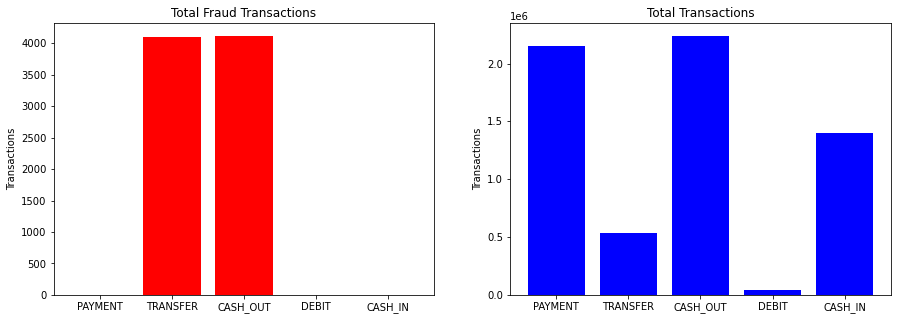

In [ ]:
# Calculate the percentage of fraud transactions
Fraudulent_Transactions = (len(data[data['isFraud'] == 1]) / data.shape[0]) * 100
print("Total Number of Fraudulent transactions: {:.2f}%".format(Fraudulent_Transactions))

# Calculate the total number of transactions for each type
No_Total_Transactions = [float(total_payments), len(Transfer_Total), float(total_cash_outs), float(total_debits), float(total_cash_ins)]

# Calculate the number of fraud occurrences for each type
fraudulent = [len(dfFraudPayment), len(Transfer_Fraud), len(dfFraudCashOut), len(dfFraudDebit), len(dfFraudCashIn)]
count_down = ["PAYMENT", "TRANSFER", "CASH_OUT", "DEBIT", "CASH_IN"]
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# Plotting the fraud occurrences
axs[0].bar(count_down, fraudulent, color='red')
axs[0].set_title("Total Fraud Transactions")
axs[0].set_ylabel("Transactions")
# Plotting the total number of transactions
axs[1].bar(count_down, No_Total_Transactions, color='blue')
axs[1].set_title("Total Transactions")
axs[1].set_ylabel("Transactions")
plt.show()

### What determines whether or not the isFlaggedFraud feature is set?

Only 16 out of 6.3 million entries have isFlaggedFraud set to 1. Only after a TRANSFER is completed and the AMOUNT exceeds 200,000 (local currency) is the isFlaggedFraud column set.

In [ ]:
total_isFlagged = data.loc[data.isFlaggedFraud == 1]
print("when isFlaggedFraud = 1 Total number of Transactions: ", len(total_isFlagged),"\n\n")
total_isFlagged

when isFlaggedFraud = 1 Total number of Transactions:  16 




,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


The oldbalanceDest and newbalanceDest values in the later table are the same (0.00). This could be the case because when the threshold is reached, the transaction is stopped. However, in TRANSFERS when both oldbalanceDest and newbalanceDest may be 0, isFlaggedFraud may continue to be 0.

**Therefore, isFlaggedFraud's status is not determined by these circumstances.**

In [ ]:
# Define conditions
first_condition = (Transfer_Total['isFlaggedFraud'] == 0)
second_condition = (Transfer_Total['oldbalanceDest'] == 0)
third_condition = (Transfer_Total['newbalanceDest'] == 0)

# DataFrame filtered based on the conditions
filtered_transfers = Transfer_Total[first_condition & second_condition & third_condition]

# Count the number of TRANSFERS
num_filtered_transfers = len(filtered_transfers)

# Print the result
print(f'\nThere are {num_filtered_transfers} number of TRANSFERS when isFlaggedFraud= 0, oldbalanceDest= 0,'
      f' and newbalanceDest = 0.')



There are 4158 number of TRANSFERS when isFlaggedFraud= 0, oldbalanceDest= 0, and newbalanceDest = 0.


In some circumstances, even if the **isFlaggedFraud** condition is true, its value remains 0.

In [ ]:
# Find the minimum amount where isFlaggedFraud is set
min_amount_flagged = total_isFlagged['amount'].min()
print("Minimum amount where isFlaggedFraud is set:", min_amount_flagged)

# Find the maximum amount in TRANSFER where isFlaggedFraud is not set
max_amount_not_flagged = data.loc[data['isFlaggedFraud'] == 0]['amount'].max()
print("Maximum amount in TRANSFER where isFlaggedFraud is not set:", max_amount_not_flagged)

# Filter for transfers with amount > 200,000 and type is 'TRANSFER'
large_transfers = data[(data['amount'] > 200000) & (data['type'] == 'TRANSFER')]

# Show the table where amount > 200,000 and isFlaggedFraud == 0
filtered_large_transfers = large_transfers[large_transfers['isFlaggedFraud'] == 0]

# Display the filtered table
filtered_large_transfers

Minimum amount where isFlaggedFraud is set: 353874.22
Maximum amount in TRANSFER where isFlaggedFraud is not set: 92445516.64


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
84,1,TRANSFER,379856.23,C1449772539,0.00,0.0,C1590550415,900180.00,19169204.93,0,0
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.0,C1744173808,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


In addition, because values on oldbalanceOrg overlap, isFlaggedFraud cannot be a threshold. When isFlaggedFraud = 0, the highest value of oldbalanceOrg is more than 200,000.

In [ ]:
# Case 1: isFlaggedFraud = 1 TRANSFERs
min_oldbalanceOrg_flagged = round(total_isFlagged[total_isFlagged.type == 'TRANSFER'].oldbalanceOrg.min(), 2)
max_oldbalanceOrg_flagged = round(total_isFlagged[total_isFlagged.type == 'TRANSFER'].oldbalanceOrg.max(), 2)

# Case 2: isFlaggedFraud = 0 TRANSFERs where oldbalanceOrg = newbalanceOrig
filtered_df = data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 0) & (data.oldbalanceOrg == data.newbalanceOrig)]
min_oldbalanceOrg_not_flagged = round(filtered_df.oldbalanceOrg.min(), 2)
max_oldbalanceOrg_not_flagged = round(filtered_df.oldbalanceOrg.max(), 2)

# Print the results
print('\nMinimun and Maximum of the oldbalanceisFlaggedFraud = 1 TRANSFERS ORG: [{}, {}]'.format(min_oldbalanceOrg_flagged, max_oldbalanceOrg_flagged))
print('\nMinimun and Maximum of the oldbalanceisFlaggedFraud = 0 TRANSFERS ORG: [{}, {}]'.format(min_oldbalanceOrg_not_flagged, max_oldbalanceOrg_not_flagged))



Minimun and Maximum of the oldbalanceisFlaggedFraud = 1 TRANSFERS ORG: [353874.22, 19585040.37]

Minimun and Maximum of the oldbalanceisFlaggedFraud = 0 TRANSFERS ORG: [0.0, 575667.54]


It's also important to determine whether isFlaggedFraud is activated when a consumer does the same transaction more than once. There are no duplicate customers with isFlaggedFraud = 0. Duplicates, however, exist when isFlaggedFraud = 1.

In [ ]:
# Transactions as Flagged
flag_transaction = data.loc[data.isFlaggedFraud == 1]

# Transactions not Flagged
notFlag_transaction = data.loc[data.isFlaggedFraud == 0]

#See if nameOrig has been marked as fraud more than once for the transaction(case_3)
case_3 = (total_isFlagged['nameOrig'].value_counts() > 1).any()

# Verify if the locations of any further transactions that were started by fraud-related transactions(case_4)
case_4 = total_isFlagged['nameDest'].isin(notFlag_transaction['nameOrig']).any()

# Determine the number of transactions that have had multiple destination accounts that have been reported as fraudulent(case_5)
case_5 = total_isFlagged['nameDest'].value_counts()
desti_acc_num_multiple = (case_4 > 1).sum()

# Print the results
print('Has nameOrig been detected as fraudulent for the transaction more than once? {}'.format(case_3))
print('Have destinations for fraud-related transactions started other transactions? {}'.format(case_4))
print('How many destination accounts for transactions marked as fraudulent were used more than once?: {}'.format(sum(total_isFlagged.nameDest.isin(notFlag_transaction.nameDest))))

Has nameOrig been detected as fraudulent for the transaction more than once? False
Have destinations for fraud-related transactions started other transactions? False
How many destination accounts for transactions marked as fraudulent were used more than once?: 2


### Are anticipated merchant accounts properly labeled?



Customers ('Customer') transactions involving CASH_IN (payment made by the merchant) are not handled by merchants ('Merchants'). For CASH_OUT transactions (paying a merchant), there are likewise no merchants among the destination accounts. For all PAYMENTs transactions in nameDest, however, there are merchants.

In [ ]:
print('Exist any Merchants in nameOrig that accept CASH_IN transactions? {}'.format((data.loc[data.type == 'CASH_IN', 'nameOrig'].str.contains('Merchants')).any()))

print('Exist any Merchants in nameDest that accept CASH_OUT payments? {}'.format((data.loc[data.type == 'CASH_OUT', 'nameDest'].str.contains('Merchants')).any()))

print('Exist any transactions where the nameDest in the PAYMENT type has no merchants? {}'.format((data.loc[data.type == 'PAYMENT', 'nameDest'].str.contains('Merchants')).any()))

Exist any Merchants in nameOrig that accept CASH_IN transactions? False
Exist any Merchants in nameDest that accept CASH_OUT payments? False
Exist any transactions where the nameDest in the PAYMENT type has no merchants? False


## Do fraudulent transactions share any account labels?

The nameDest for the TRANSFER and nameOrig for the CASH_OUT should match since the data indicates that fraud includes first TRANSFERRING money to an account then withdrawing (CASH_OUT) it. This is not the case, though.


In [ ]:
print('Exist any transactions where nameOrig for CASH_OUT and nameDest for TRANSFER match? {}\n\n'.format(
    (total_isFlagged[total_isFlagged.type == 'TRANSFER'].nameDest.isin(total_isFlagged[total_isFlagged.type == 'CASH_OUT'].nameOrig)).any()))

#To display dataframe where isFraud==1
isfraud_data=data.loc[data.isFraud == 1]
isfraud_data

Exist any transactions where nameOrig for CASH_OUT and nameDest for TRANSFER match? False




,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In 3 accounts, a fraudulent TRANSFER has occurred but the initial CASHOUT has not been identified and is still shown as real. 2 out of 3 accounts first made a legitimate CASH_OUT and then got a fake TRANSFER. The nameOrig and nameDest features are not capable of detecting fraudulent transactions.

In [ ]:
# Dataframe for Non-fraudulent
not_fraud_df = data.loc[data.isFraud == 0]

# Filter bogus TRANSFERs whose final destination accounts have valid CASH_OUTs at the time of the TRANSFER.
genuine_cashout_with_fraudulent_transfer = Transfer_Fraud.loc[Transfer_Fraud.nameDest.isin(not_fraud_df.loc[not_fraud_df.type == 'CASH_OUT', 'nameOrig'].drop_duplicates())]
print("Transfers that were fraudulent yet the destination accounts had legitimate cash-outs at the time.\n\n")
genuine_cashout_with_fraudulent_transfer

Transfers that were fraudulent yet the destination accounts had legitimate cash-outs at the time.




,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1030443,65,TRANSFER,1282971.57,C1175896731,1282971.57,0.0,C1714931087,0.0,0.0,1,0
6039814,486,TRANSFER,214793.32,C2140495649,214793.32,0.0,C423543548,0.0,0.0,1,0
6362556,738,TRANSFER,814689.88,C2029041842,814689.88,0.0,C1023330867,0.0,0.0,1,0


## Data cleaning

### Removing Unnecessary Columns

Only TRANSFERS and CASH_OUTS are subject to fraud. According to the description in the Data Analysis section, the fields nameOrig, nameDest, and isFlaggedFraud are not significant.

In [ ]:
# Choose rows where the value of 'type' is either 'TRANSFER' or 'CASH_OUT'
X_new = data[data['type'].isin(['TRANSFER', 'CASH_OUT'])]

# Define the columns to eliminate
drop_columns = ['nameOrig', 'nameDest', 'isFlaggedFraud']

# Drop unnecessary columns in X_new
X_new = X_new.drop(columns=drop_columns)

# Create y_new by selecting the 'isFraud' column from X_new
y_new = X_new['isFraud']

In [ ]:
# Display X_new
X_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


## Data Encoding

The fields must be integers in order to use different machine learning algorithms on the data. CASH_OUTs are represented by 1, and TRANSFERs by 0.


In [ ]:
# In the 'type' column, change 'TRANSFER' to 0 and 'CASH_OUT' to 1.
X_new['type'] = X_new['type'].replace({'TRANSFER': 0, 'CASH_OUT': 1})

# Change the 'type' column's type value from string to int.
X_new['type'] = X_new['type'].astype(int)

# Display data
X_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.00,0.0,0.00,0.00,1
3,1,1,181.00,181.00,0.0,21182.00,0.00,1
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,0,215310.30,705.00,0.0,22425.00,0.00,0
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,0,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,0,850002.52,850002.52,0.0,0.00,0.00,1


## Handling Missing Values

The newbalanceDest column in the data contains transactions with 0.00 before and after non-zero amounts are transacted, suggesting that it may be tied to fraud. We swap out the value of 0 with -1, which is better for the various machine learning methods.


In [ ]:
Xfraud = X_new.loc[y_new == 1]
XnonFraud = X_new.loc[y_new == 0]
print('\nThe fraction of fraudulent transactions with \'oldBalanceDest\' = \'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & (Xfraud.newbalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('\nThe fraction of genuine transactions with \'oldBalanceDest\' = \'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}\n\n'.\
format(len(XnonFraud.loc[(XnonFraud.oldbalanceDest == 0) & (XnonFraud.newbalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))

X_new.loc[(X_new.oldbalanceDest == 0) & (X_new.newbalanceDest == 0) & (X_new.amount != 0), ['oldbalanceDest', 'newbalanceDest']] = - 1
X_new


The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.4955558261293072

The fraction of genuine transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0006176245277308345




,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.00,0.0,-1.00,-1.00,1
3,1,1,181.00,181.00,0.0,21182.00,0.00,1
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,0,215310.30,705.00,0.0,22425.00,0.00,0
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00,1
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,0,850002.52,850002.52,0.0,-1.00,-1.00,1


Additionally, there are a number of transactions where both oldbalanceOrg and newbalanceOrig have no balance.


In [ ]:
transactions_legal = X_new.loc[(X_new.oldbalanceOrg == 0.0) & (X_new.newbalanceOrig == 0) & (X_new.isFraud == 0)]
transactions_illegal = X_new.loc[(X_new.oldbalanceOrg == 0.0) & (X_new.newbalanceOrig == 0) & (X_new.isFraud == 1)]

print("When oldbalanceOrg and newbalanceOrig are 0, there are {} legitimate transactions and there is no fraud.\n".format(len(transactions_legal)))
print("When oldbalanceOrg and newbalanceOrig are 0, and there are {} no fraud transactions.".format(len(transactions_illegal)))

When oldbalanceOrg and newbalanceOrig are 0, there are 1308541 legitimate transactions and there is no fraud.

When oldbalanceOrg and newbalanceOrig are 0, and there are 41 no fraud transactions.


## Feature Engineering

When there is a serving with a zero balance, there is a significant distinction between fraudulent and legitimate transactions. Errors in the originating (errorBalanceOrig) and destination (errorBalanceDest) accounts for each transaction are recorded in two additional columns. This aids in separating fraudulent and legitimate transactions with zero balances. To obtain the maximum performance out of machine learning algorithms, these properties are crucial.

In [ ]:
# Calculate 'errorBalanceOrig'
X_new['Balance_Error_Orig'] = X_new['newbalanceOrig'] + X_new['amount'] - X_new['oldbalanceOrg']

# Calculate 'errorBalanceDest'
X_new['Balance_Error_Dest'] = X_new['oldbalanceDest'] + X_new['amount'] - X_new['newbalanceDest']
X_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Balance_Error_Orig,Balance_Error_Dest
2,1,0,181.00,181.00,0.0,-1.00,-1.00,1,0.00,1.810000e+02
3,1,1,181.00,181.00,0.0,21182.00,0.00,1,0.00,2.136300e+04
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,0,213808.94,1.827035e+05
19,1,0,215310.30,705.00,0.0,22425.00,0.00,0,214605.30,2.377353e+05
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,0,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1,0.00,0.000000e+00
6362616,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00,1,0.00,6.311409e+06
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0.00,1.000000e-02
6362618,743,0,850002.52,850002.52,0.0,-1.00,-1.00,1,0.00,8.500025e+05


## Time visualisation

### Over Time Transactions


The temporal patterns for legal and illegal transactions are depicted in the following histograms. Between time steps 0 and 60 and 110 to 410, the majority of legitimate transactions take place. For each time step of the month, the visualizations show the number of transactions.


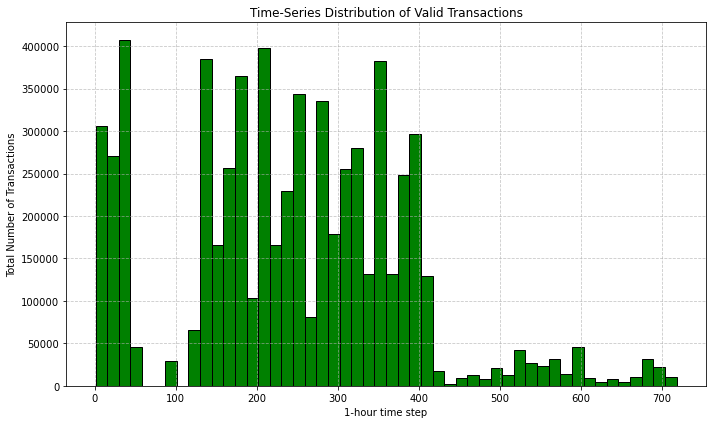

In [ ]:
#Create a subset of the dataframe that only includes legitimate (non-fraudulent) transactions.
Real_transactions = data[data["isFraud"] == 0].drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

#Determine the number of bins for the histogram.
bins = 50

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility
plt.hist(Real_transactions["step"], color="green", bins=bins, edgecolor="black")

# labell and title for plot
plt.xlabel("1-hour time step")
plt.ylabel("Total Number of Transactions")
plt.title("Time-Series Distribution of Valid Transactions")

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)
# Display the plot
plt.tight_layout()
plt.show()

Over time, there is little variation in the frequency of fraudulent transactions.

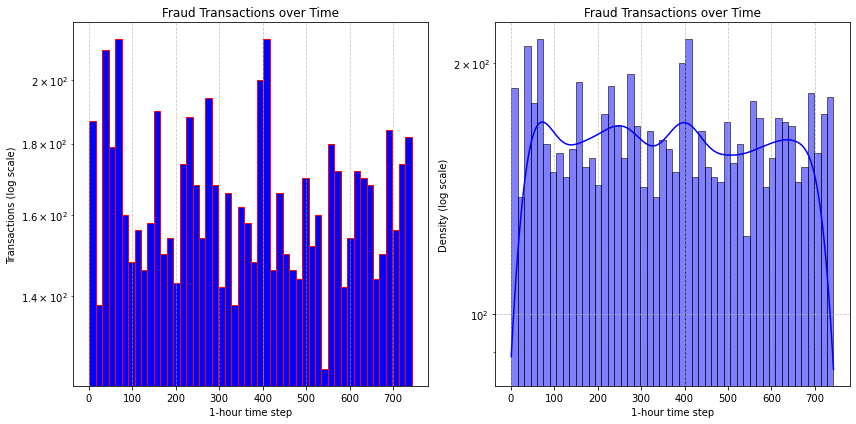

In [ ]:
# Dataframe containing fraudulent transactions
transaction_fraud = data[data["isFraud"] == 1].drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

# number of bins=50
bins = 50

# Create the plot of histogram and density curve
plt.figure(figsize=(12, 6))

# First subplot of histogram
plt.subplot(1, 2, 1)
plt.hist(transaction_fraud["step"], color="blue", bins=bins, edgecolor="red")
plt.yscale('log')
plt.xlabel("1-hour time step")
plt.ylabel("Transactions (log scale)")
plt.title("Fraud Transactions over Time")
plt.grid(True, linestyle='--', alpha=0.7)

# Create density curve
plt.subplot(1, 2, 2)
sns.histplot(transaction_fraud["step"], color="blue", bins=bins, kde=True)
plt.yscale('log')
plt.xlabel("1-hour time step")
plt.ylabel("Density (log scale)")
plt.title("Fraud Transactions over Time")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Weekday and hourly transactions

Find out what time and what day of the week a transaction was completed.


In [ ]:
# For Transaction hour
X_new["DayHouur"] = (X_new.step % 24)

# For Transaction day
X_new["WeekDay"] = (X_new.step % 7)
X_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Balance_Error_Orig,Balance_Error_Dest,DayHouur,WeekDay
2,1,0,181.00,181.00,0.0,-1.00,-1.00,1,0.00,1.810000e+02,1,1
3,1,1,181.00,181.00,0.0,21182.00,0.00,1,0.00,2.136300e+04,1,1
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,0,213808.94,1.827035e+05,1,1
19,1,0,215310.30,705.00,0.0,22425.00,0.00,0,214605.30,2.377353e+05,1,1
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,0,300850.89,-2.401220e+06,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1,0.00,0.000000e+00,23,1
6362616,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00,1,0.00,6.311409e+06,23,1
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0.00,1.000000e-02,23,1
6362618,743,0,850002.52,850002.52,0.0,-1.00,-1.00,1,0.00,8.500025e+05,23,1


### Daily

Day 0 here doesn't refer to a Monday or a Sunday. From the latter plots, there is insufficient proof that fraudulent transactions take place on a specific day of the week. It is therefore unnecessary to display the day of the week.

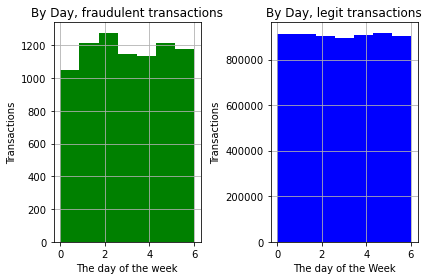

In [ ]:
# For no. of days
total_no_of_days = 7

# Calculate fraudulent transactions par days
days_of_fraudulent = transaction_fraud.step % total_no_of_days

# Calculate Legit transactions par days
legal_transaction_days = Real_transactions.step % total_no_of_days


# Plot fraudulent transactions (green) and the legit transactions (blue)
plt.subplot(1, 2, 1)
days_of_fraudulent.hist(bins=total_no_of_days,color="green")
plt.title('By Day, fraudulent transactions')
plt.xlabel('The day of the week')
plt.ylabel("Transactions")
plt.subplot(1,2,2)
legal_transaction_days.hist(bins=total_no_of_days,color="blue")
plt.title('By Day, legit transactions')
plt.xlabel('The day of the Week')
plt.ylabel("Transactions")
plt.tight_layout()
plt.show()

### Transactions per Hour

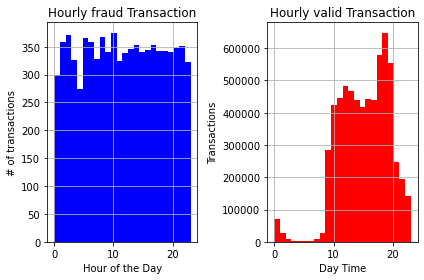

In [ ]:
#create for hours
total_hours=24

# Determine the amount of fraudulent transactions that occur per hour
transaction_fraud_hour = transaction_fraud.step % total_hours


# Determine the amount of legal transactions that occur per hour.
legit_transaction_hours = Real_transactions.step % total_hours

plt.subplot(1, 2, 1)
transaction_fraud_hour.hist(bins=total_hours, color="blue")
plt.title('Hourly fraud Transaction')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
legit_transaction_hours.hist(bins=total_hours, color="red")
plt.title('Hourly valid Transaction')
plt.xlabel('Day Time')
plt.ylabel("Transactions")

plt.tight_layout()
plt.show()

### visualization of data

It is necessary to view the fraudulent and legitimate transactions in order to determine whether the Machine Learning algorithms will produce accurate predictions. The distribution of the various transaction types is shown in the scatterplot.

In [ ]:
visualization = len(X_new)
def dataplot(x, y, hue, figsize = (14, 9)):
    figure = plt.figure(figsize = figsize)
    plotting = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, hue = hue, jitter = 0.4, marker = '.', size = 6, palette = plotting)
        ax.set_xlabel('')
        ax.set_xticklabels(['general transaction', 'fraudulent transaction'], size = 18)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash out'], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, fontsize = 18);

    return ax

Genuine CASH_OUT transactions exceed genuine TRANSFERs. The jitter parameter in the plotStrip function defines the width of a fingerprint. It tries to make separation between transactions that occur at the same time with different abscissae (X axis).

Fraudulent transactions are more homogeneously distributed compared to genuine ones.

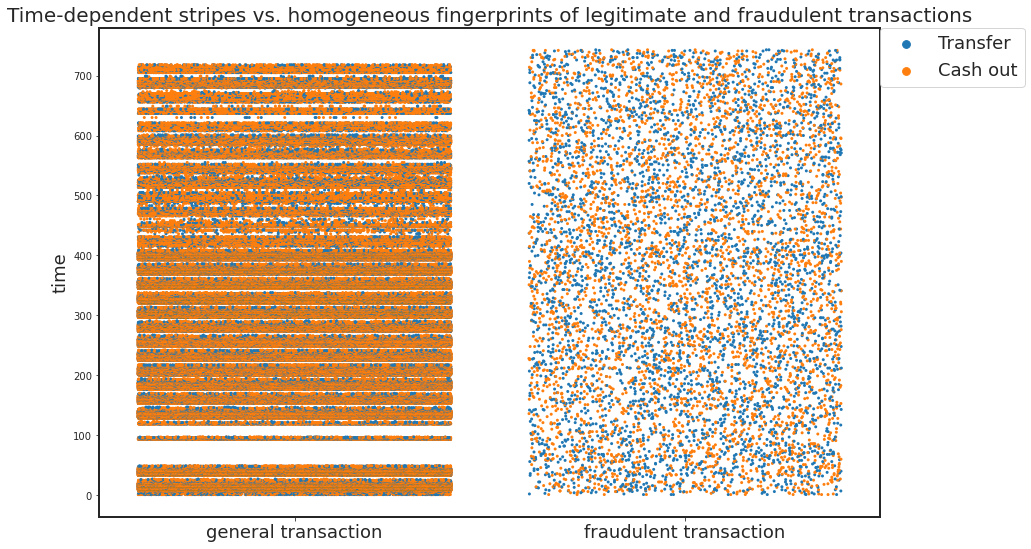

In [ ]:
ax = dataplot(y_new[:visualization], X_new.step[:visualization], X_new.type[:visualization])
ax.set_ylabel('time', size = 18)
ax.set_title('Time-dependent stripes vs. homogeneous fingerprints of legitimate and fraudulent transactions', size = 20);

The scatterplot demonstrates that for detecting fraud, errorBalanceDest is superior to amount.


Text(0.5, 1.0, 'Same-signed fingerprints of genuine and fraudulent transactions over amount')

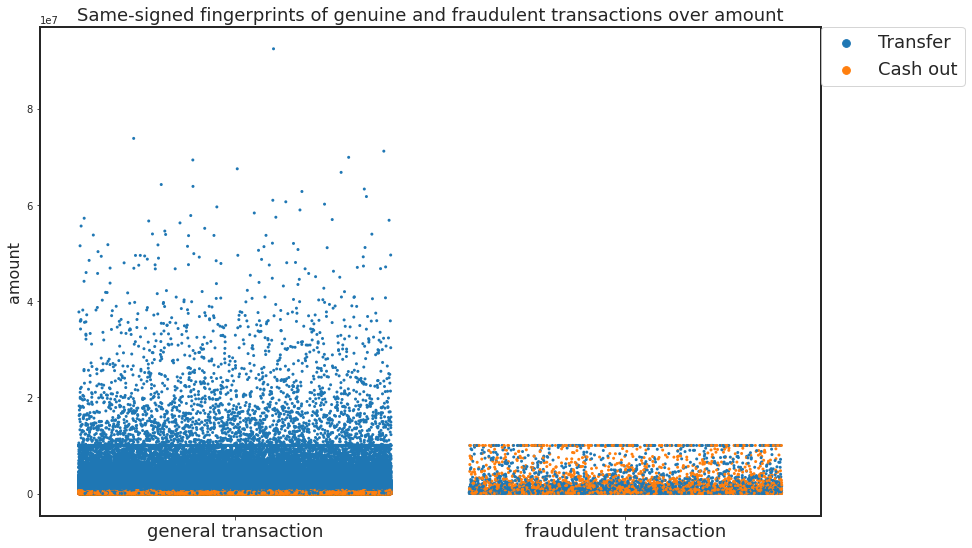

In [ ]:
limit = len(X_new)
ax = dataplot(y_new[:limit], X_new.amount[:limit], X_new.type[:limit], figsize = (14, 9))
ax.set_ylabel('amount', size = 16)
ax.set_title('Same-signed fingerprints of genuine and fraudulent transactions over amount', size = 18)

Transaction dispersion over errorBalanceDest reveals that CASH_OUT transactions are more prevalent.


Text(0.5, 1.0, 'Opposite polarity fingerprints over the error in destination account balances')

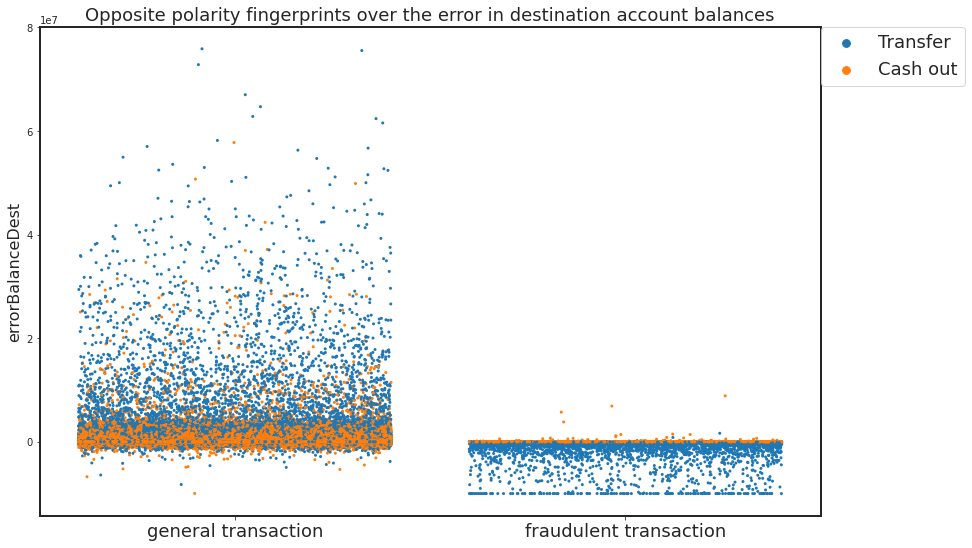

In [ ]:
plotted = len(X_new)
ax = dataplot(y_new[:plotted], - X_new.Balance_Error_Dest[:plotted], X_new.type[:plotted], figsize = (14, 9))
ax.set_ylabel('errorBalanceDest', size = 16)
ax.set_title('Opposite polarity fingerprints over the error in destination account balances', size = 18)

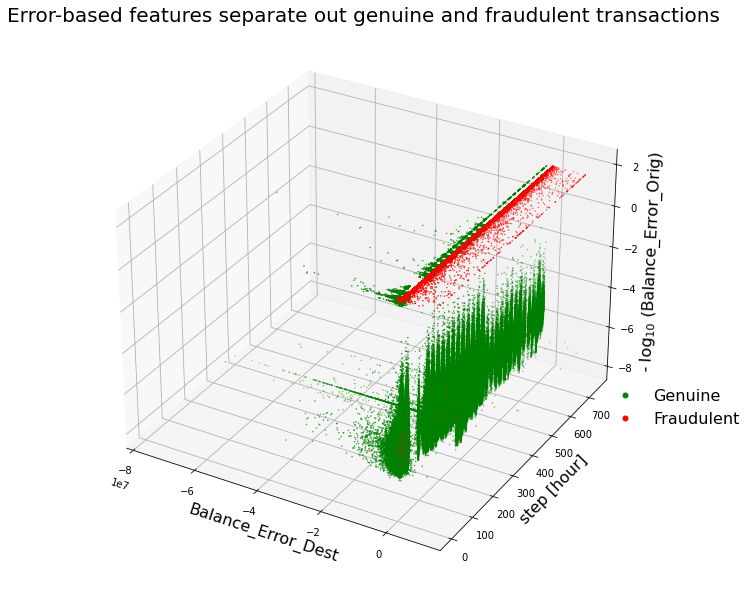

In [ ]:
# Define the key variables
x_label = 'Balance_Error_Dest'
y_label = 'step'
z_label = 'Balance_Error_Orig'
z_offset = 0.02
data_limit = len(X_new)

# Reset Seaborn to its default settings
sns.reset_orig()

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot genuine transactions
genuine_data = X_new[y_new == 0][:data_limit]
ax.scatter(genuine_data[x_label], genuine_data[y_label], -np.log10(genuine_data[z_label] + z_offset), c='g', marker='.', s=1, label='Genuine')

# Plot fraudulent transactions
fraudulent_data = X_new[y_new == 1][:data_limit]
ax.scatter(fraudulent_data[x_label], fraudulent_data[y_label], -np.log10(fraudulent_data[z_label] + z_offset), c='r', marker='.', s=1, label='Fraudulent')

# Customize the plot labels and title
ax.set_xlabel(x_label, size=16)
ax.set_ylabel(y_label + ' [hour]', size=16)
ax.set_zlabel('- log$_{10}$ (' + z_label + ')', size=16)
ax.set_title('Error-based features separate out genuine and fraudulent transactions', size=20)

# Adjust the plot appearance
plt.axis('tight')
ax.grid(1)

# Create a legend
noFraudMarker = mlines.Line2D([], [], linewidth=0, color='g', marker='.', markersize=10, label='Genuine')
fraudMarker = mlines.Line2D([], [], linewidth=0, color='r', marker='.', markersize=10, label='Fraudulent')
plt.legend(handles=[noFraudMarker, fraudMarker], bbox_to_anchor=(1.20, 0.38), frameon=False, prop={'size': 16})

# Show the 3D scatter plot
plt.show()

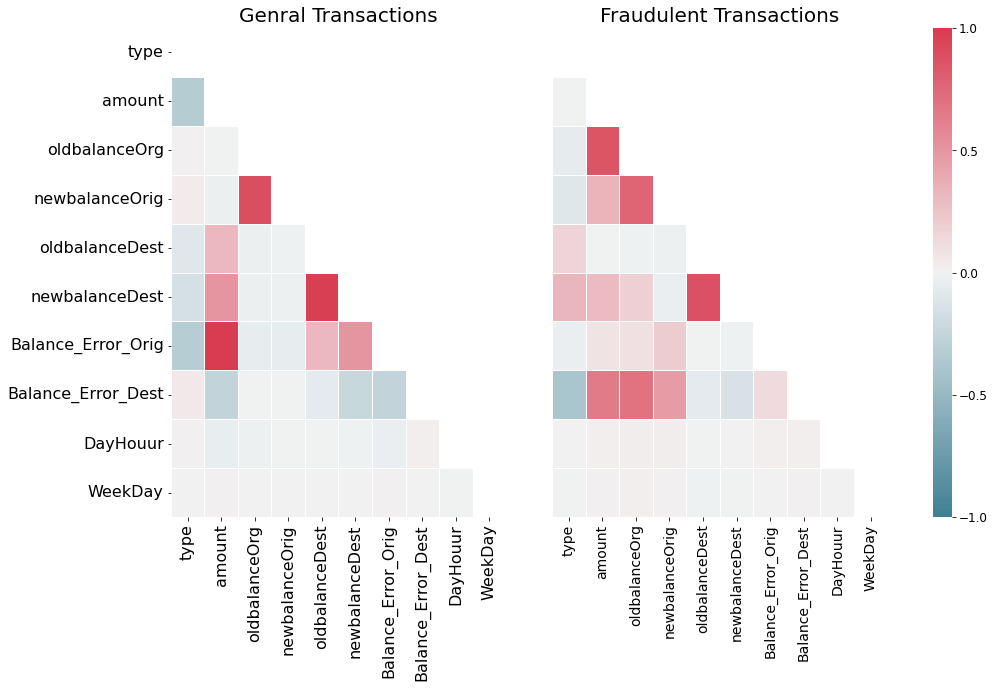

In [ ]:
Genral_corr = X_new.loc[y_new == 1]
Fraud_corr = X_new.loc[y_new == 0]

legit_corr = Fraud_corr.loc[:, (X_new.columns != 'step') & (X_new.columns != 'isFraud')].corr()

values = np.zeros_like(legit_corr, dtype=bool)
values[np.triu_indices_from(values)] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (x_axis1, x_axis2, cbar_axis) = plt.subplots(1, 3, gridspec_kw=grid_kws, figsize=(14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)

x_axis1 = sns.heatmap(legit_corr, ax=x_axis1, vmin=-1, vmax=1, cmap=cmap, square=False, linewidths=0.5, mask=values, cbar=False)
x_axis1.set_xticklabels(x_axis1.get_xticklabels(), size=16)
x_axis1.set_yticklabels(x_axis1.get_yticklabels(), size=16)
x_axis1.set_title('Genral Transactions', size=20)

# Replace with your actual data
illegal_corr = Genral_corr.loc[:, (X_new.columns != 'step') & (X_new.columns != 'isFraud')].corr()

x_axis2 = sns.heatmap(illegal_corr, vmin=-1, vmax=1, cmap=cmap, ax=x_axis2, square=False, linewidths=0.5, mask=values, yticklabels=False, cbar_ax=cbar_axis, cbar_kws={'orientation': 'vertical', 'ticks': [-1, -0.5, 0, 0.5, 1]})
x_axis2.set_xticklabels(x_axis2.get_xticklabels(), size=14)
x_axis2.set_title('Fraudulent Transactions', size=20)

cbar_axis.set_yticklabels(cbar_axis.get_yticklabels(), size=12)

plt.show()

### Extreme Gradient Boosting (XGBoost)

**Extreme Gradient Boosting** operates quickly and effectively. Regression and classification issues are addressed by it. For other models, XGBoost is utilized as a starting point to provide Accurate predictions.

In [ ]:
# Create a new dataset for train_test_split
X = X_new.drop(['isFraud'], axis = 1)
# Do train test split with 80% of trainning and 20% with testing
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size = 0.2, random_state = 5)

In [ ]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Balance_Error_Orig,Balance_Error_Dest,DayHouur,WeekDay
2,1,0,181.00,181.00,0.0,-1.00,-1.00,0.00,1.810000e+02,1,1
3,1,1,181.00,181.00,0.0,21182.00,0.00,0.00,2.136300e+04,1,1
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,213808.94,1.827035e+05,1,1
19,1,0,215310.30,705.00,0.0,22425.00,0.00,214605.30,2.377353e+05,1,1
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,300850.89,-2.401220e+06,1,1
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,0.00,0.000000e+00,23,1
6362616,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00,0.00,6.311409e+06,23,1
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,0.00,1.000000e-02,23,1
6362618,743,0,850002.52,850002.52,0.0,-1.00,-1.00,0.00,8.500025e+05,23,1


In [ ]:
# Calculate weights for the imbalanced class
weights = (y_new == 0).sum() / (1.0 * (y_new == 1).sum())

# Number of parallel threads for XGBoost
jobs = 4

# The maximum tree depth for base learners
depth = 3

# Create the XGBoost classifier with the specified parameters
Xgb_model = XGBClassifier(max_depth=depth, scale_pos_weight=weights, n_jobs=jobs)

# Train the model
Xgb_model.fit(X_train, y_train)

# Get probabilities of class 1 (fraudulent transactions)
results = Xgb_model.predict_proba(X_test)

# Calculate the average precision score
avg_precision = average_precision_score(y_test, results[:, 1])
print('Average Precision Score: {:.4f}'.format(avg_precision))

Average Precision Score: 0.9985


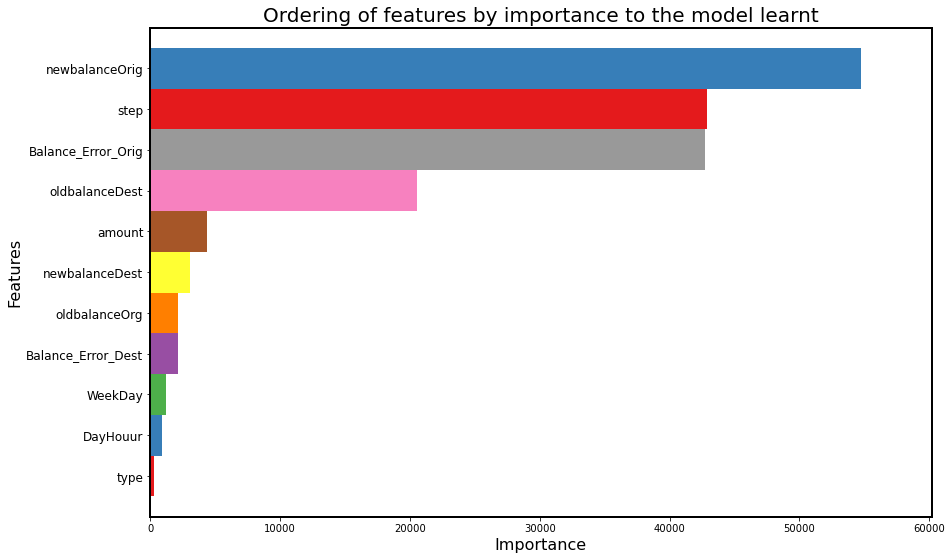

In [ ]:
variables = plt.figure(figsize=(14, 9))
sizes = variables.add_subplot(111)
shape = plt.cm.Set1(np.linspace(0, 1, 9))
# Assuming 'Xgb_model' is your classifier and you have already fitted it
# You might need to replace 'Xgb_model' with your actual classifier variable
sizes = plot_importance(Xgb_model, height=1, color=shape, grid=False, show_values=False, importance_type='cover', ax=sizes)
for axis in ['top', 'bottom', 'left', 'right']:
    sizes.spines[axis].set_linewidth(2)
sizes.set_xlabel('Importance', size=16)
sizes.set_ylabel('Features', size=16)
sizes.set_yticklabels(sizes.get_yticklabels(), size=12)
sizes.set_title('Ordering of features by importance to the model learnt', size=20)
plt.show()


In [ ]:
X_new= X_new.drop(['type'], axis =1)
X_new

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Balance_Error_Orig,Balance_Error_Dest,DayHouur,WeekDay
2,1,181.00,181.00,0.0,-1.00,-1.00,1,0.00,1.810000e+02,1,1
3,1,181.00,181.00,0.0,21182.00,0.00,1,0.00,2.136300e+04,1,1
15,1,229133.94,15325.00,0.0,5083.00,51513.44,0,213808.94,1.827035e+05,1,1
19,1,215310.30,705.00,0.0,22425.00,0.00,0,214605.30,2.377353e+05,1,1
24,1,311685.89,10835.00,0.0,6267.00,2719172.89,0,300850.89,-2.401220e+06,1,1
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.0,0.00,339682.13,1,0.00,0.000000e+00,23,1
6362616,743,6311409.28,6311409.28,0.0,-1.00,-1.00,1,0.00,6.311409e+06,23,1
6362617,743,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0.00,1.000000e-02,23,1
6362618,743,850002.52,850002.52,0.0,-1.00,-1.00,1,0.00,8.500025e+05,23,1


In [ ]:
# Save Dataframe as csv file
X.to_csv('X.csv', index=False)

In [ ]:
y_new.to_csv('y_new', index=False)

### Conclusion
Exploratory Data Analysis (EDA) for Fraud Detection with PaySim Dataset
Recap of the Journey
In this notebook, we embarked on an insightful journey into the world of fraud detection using the PaySim dataset. Our primary objective was to explore and gain a deep understanding of the dataset through Exploratory Data Analysis (EDA). By leveraging the power of EDA, we unearthed valuable insights that are fundamental to building robust fraud detection models.